In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.18.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
import pandas as pd

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Set the correct file path (Update with your actual path)
file_path = "/content/drive/MyDrive/Project Data/Twitterdata.csv"  # Change as needed

# Step 3: Read the CSV file
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Step 4: Print the dataset
print(df.head())



Mounted at /content/drive
   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [3]:
# import pandas as pd

# file_path = "/content/sentiment140/training.1600000.processed.noemoticon.csv"  # Correct file path

# df = pd.read_csv(file_path, encoding='latin-1', header=None, nrows=20)
# print(df)


In [4]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

In [5]:
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df['sentiment'].value_counts()

,count
sentiment,
0,800000
4,800000


In [7]:
df=df.drop(['id','date','query','user_id'],axis=1)

In [8]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [11]:
import numpy as np  # Use numpy properly

df.reset_index(drop=True, inplace=True)

# Generate 10 unique random indices
random_idx_list = np.random.choice(df.index, size=10, replace=False)  # Corrected

# Select rows based on random indices
df_sample = df.loc[random_idx_list, :]

print(df_sample.head(10))  # Display first 10 random rows


        sentiment                                               text
1445473  Positive  @McKensieLatrel Hey Im am sleep talkin lol wha...
1218431  Positive                Going to lunch soon  ttyl laterzzz.
176693   Negative           @Its_Aitana K ??? What??? No way!!!! No 
699990   Negative  @Makkya Don't think, just do it! :-P &lt;-- pi...
19789    Negative  i have been trying all day but i simply cannot...
543119   Negative       @deucescracked sry to hear that man  #dcwsop
1025245  Positive     Just put a fresh peace of gum in my gum paper 
39530    Negative              omg i have a nasty blister on my toe 
1372856  Positive  had fun with my lil homie tonight!! felt good ...
707096   Negative                              I need my phone back 


In [12]:

def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [13]:

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [14]:
df.head()


,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [15]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Project Data/Twitterdata.csv"
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign proper column names
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

# Check unique sentiment values
print("Unique sentiment values in dataset:", df["sentiment"].unique())

# Count how many positive and negative tweets exist
print(df["sentiment"].value_counts())


Unique sentiment values in dataset: [0 4]
sentiment
0    800000
4    800000
Name: count, dtype: int64


In [16]:
print(df['sentiment'].unique())  # Show unique values in 'sentiment' column


[0 4]


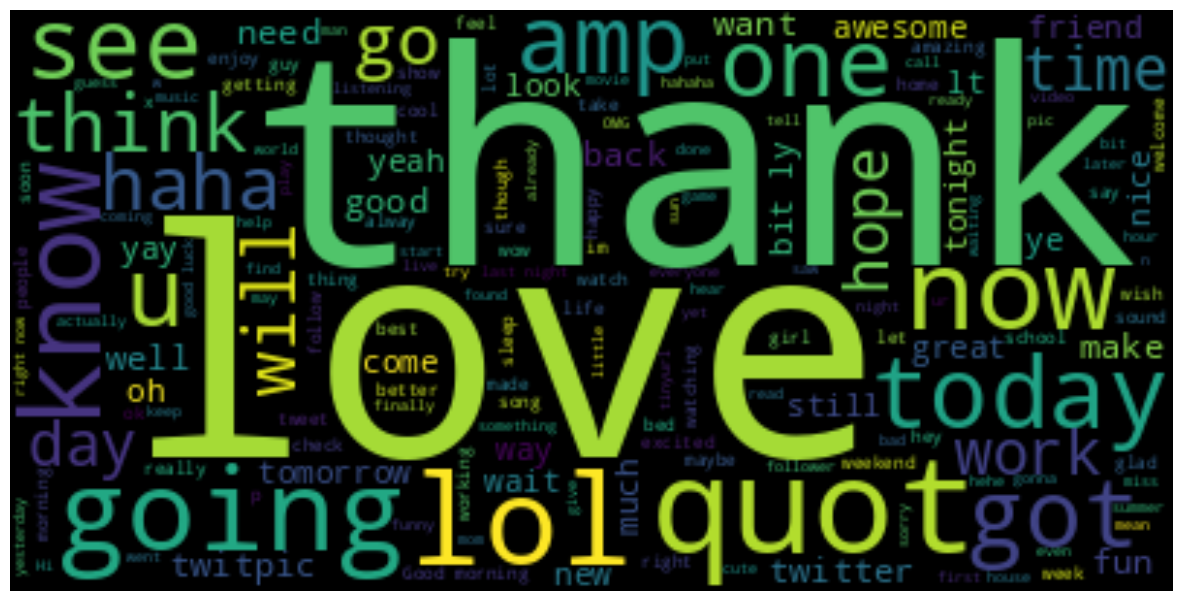

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Drop NaN and empty texts
df = df.dropna(subset=['text'])
df = df[df['text'].str.strip() != '']

plt.figure(figsize=(15, 15))

# Generate word cloud only if there's data
if not df[df['sentiment'] == 4].empty:
    wc = WordCloud(max_words=500).generate(" ".join(df[df['sentiment'] == 4]['text']))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No text data available for sentiment 4.")


Unique sentiment labels in the dataset: [0 4]


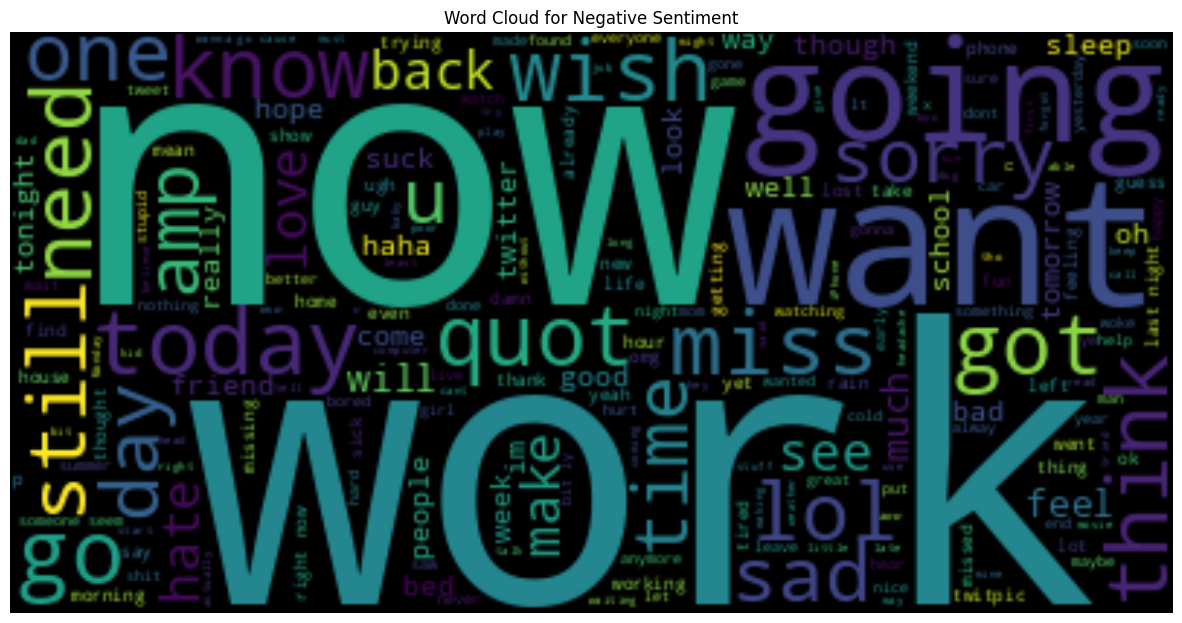

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure 'text' and 'sentiment' columns exist
if 'text' not in df.columns or 'sentiment' not in df.columns:
    print("Error: 'text' or 'sentiment' column not found in the DataFrame.")
else:
    # Drop NaN and empty text values
    df = df.dropna(subset=['text'])
    df = df[df['text'].str.strip() != '']

    # Convert sentiment column to integer (if needed)
    df['sentiment'] = df['sentiment'].astype(int)

    # Check available sentiment labels
    print("Unique sentiment labels in the dataset:", df['sentiment'].unique())

    plt.figure(figsize=(15, 15))

    # Generate word cloud for Negative Sentiment (0)
    if 0 in df['sentiment'].unique():
        wc = WordCloud(max_words=500).generate(" ".join(df[df['sentiment'] == 0]['text']))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title("Word Cloud for Negative Sentiment")
        plt.show()
    else:
        print("No text data available for sentiment 0.")


In [19]:
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [20]:
train_data, test_data = train_test_split(df, test_size=0.2,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 595083


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [23]:
labels = train_data.sentiment.unique().tolist()

In [24]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [25]:
import os

# Correct the folder name
BASE_DIR = "/content/drive/MyDrive/Project Data"
GLOVE_EMB = os.path.join(BASE_DIR, "glove.6B.300d.txt")

# Check if file exists
if not os.path.exists(GLOVE_EMB):
    raise FileNotFoundError(f"❌ File not found: {GLOVE_EMB}. Please check the path!")

print("✅ GloVe file found. Loading embeddings...")

# Load GloVe
embeddings_index = {}
with open(GLOVE_EMB, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = list(map(float, values[1:]))  # Convert to float
        embeddings_index[word] = vector

print(f"✅ Loaded {len(embeddings_index)} word vectors.")


✅ GloVe file found. Loading embeddings...
✅ Loaded 400000 word vectors.


In [26]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [27]:
EMBEDDING_DIM = 300  # GloVe 300d
LR = 1e-3  # Learning Rate
BATCH_SIZE = 1024
EPOCHS = 10
MAX_VOCAB_SIZE = 20000  # Maximum number of unique words
MAX_SEQUENCE_LENGTH = 100  # Maximum sentence length

In [28]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [29]:

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [33]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 100  # Model expects input of this length

x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

print(f"✅ x_train shape: {x_train.shape}")  # Should be (batch_size, 100)
print(f"✅ x_test shape: {x_test.shape}")    # Should be (batch_size, 100)


✅ x_train shape: (1280000, 100)
✅ x_test shape: (320000, 100)


In [35]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 513s 401ms/step - accuracy: 0.7219 - loss: 0.5425 - val_accuracy: 0.7929 - val_loss: 0.4434 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 498s 398ms/step - accuracy: 0.7828 - loss: 0.4600 - val_accuracy: 0.8002 - val_loss: 0.4293 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 500s 400ms/step - accuracy: 0.7934 - loss: 0.4421 - val_accuracy: 0.8050 - val_loss: 0.4212 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 489s 389ms/step - accuracy: 0.7974 - loss: 0.4344 - val_accuracy: 0.8084 - val_loss: 0.4167 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 543s 422ms/step - accuracy: 0.8013 - loss: 0.4272 - val_accuracy: 0.8079 - val_loss: 0.4171 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 568s 428ms/step - accuracy: 0.8035 - loss: 0.4235 - val_accuracy: 0.8101 - val_loss: 0.4143 - learning_rate: 0.0010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 522s 418ms

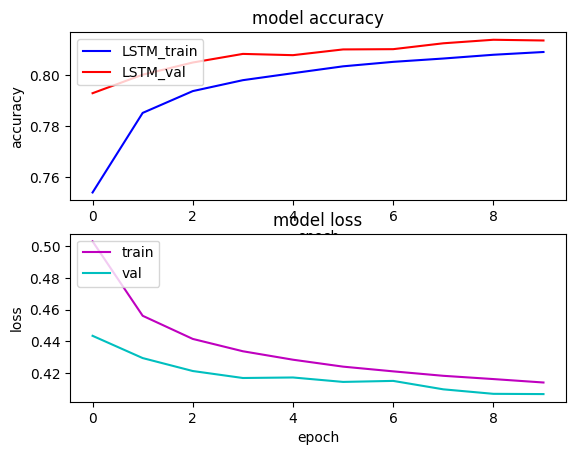

In [36]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [37]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step


In [38]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

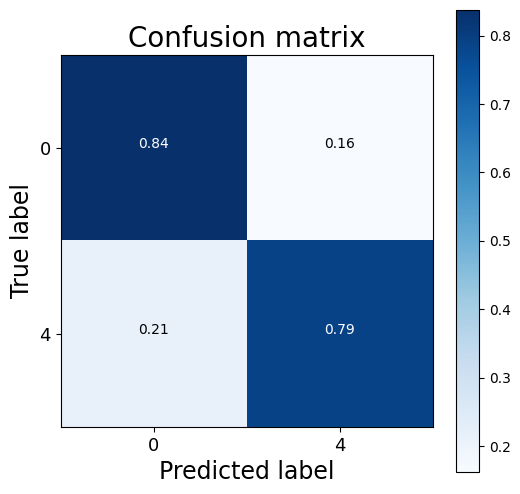

In [41]:
# Map 'Negative' to 0 and 'Positive' to 4
test_data['sentiment'] = test_data['sentiment'].replace({'Negative': 0, 'Positive': 4}).astype(int)

# Ensure predictions are also integers
y_pred_1d = np.array([0 if label == 'Negative' else 4 for label in y_pred_1d], dtype=int)

cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=np.unique(test_data.sentiment), title="Confusion matrix")
plt.show()


In [42]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82    160542
           4       0.83      0.79      0.81    159458

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



In [44]:
model.save('sentiment_model.h5')  # Saves the model as an HDF5 file


In [45]:
from google.colab import files
files.download('sentiment_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('sentiment_model.h5')  # Make sure the model is saved in your working directory


In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

new_texts = ["I love this product!", "This is the worst experience ever.", "Absolutely amazing!", "I hate it."]

sequences = tokenizer.texts_to_sequences(new_texts)

padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

predictions = model.predict(padded_sequences)

predicted_labels = ['Positive' if pred > 0.5 else 'Negative' for pred in predictions]

for text, label in zip(new_texts, predicted_labels):
    print(f"Text: {text} --> Sentiment: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Text: I love this product! --> Sentiment: Positive
Text: This is the worst experience ever. --> Sentiment: Negative
Text: Absolutely amazing! --> Sentiment: Negative
Text: I hate it. --> Sentiment: Negative


In [51]:
new_texts = [
    "The movie was fantastic! I enjoyed every moment.",
    "I had a horrible experience with this service. Never using it again!",
    "This is just okay, nothing special.",
    "Absolutely brilliant! Exceeded all my expectations.",
    "Worst product ever! A total waste of money.",
    "The quality is amazing, totally worth it!",
    "Not bad, but could be better.",
    "I will never buy this again. Terrible experience.",
    "Highly recommended! Five stars from me.",
    "It's just an average experience, nothing too exciting."
]

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(new_texts)

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Make predictions
predictions = model.predict(padded_sequences)

# Convert probabilities to sentiment labels
predicted_labels = ['Positive' if pred > 0.5 else 'Negative' for pred in predictions]

# Print results
for text, label in zip(new_texts, predicted_labels):
    print(f"Text: {text} --> Sentiment: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Text: The movie was fantastic! I enjoyed every moment. --> Sentiment: Positive
Text: I had a horrible experience with this service. Never using it again! --> Sentiment: Negative
Text: This is just okay, nothing special. --> Sentiment: Positive
Text: Absolutely brilliant! Exceeded all my expectations. --> Sentiment: Positive
Text: Worst product ever! A total waste of money. --> Sentiment: Negative
Text: The quality is amazing, totally worth it! --> Sentiment: Positive
Text: Not bad, but could be better. --> Sentiment: Positive
Text: I will never buy this again. Terrible experience. --> Sentiment: Negative
Text: Highly recommended! Five stars from me. --> Sentiment: Positive
Text: It's just an average experience, nothing too exciting. --> Sentiment: Positive
